In [5]:
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

td_props = [('font-size', '20px')]
th_props = [('font-size', '20px')]
styles = [dict(selector="td", props=td_props), dict(selector="th", props=th_props)]

# Transformando dados


#### gabriela cavalcante

#### francisco campos

#### nicolas lima

#### valmir correa

# por que transformar os dados?

# escalando os valores

- Normalizar

- Padronizar (*Standardize*)

This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

In [6]:
import pandas as pd
import numpy as np

# dados contendo informações do censo de 1990 da California
housing = pd.read_csv("https://raw.githubusercontent.com/gabicavalcante/data-transform/master/housing.csv", sep=",")
housing.head().style.set_table_styles(styles)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY


# pra que normalizar os dados?

### algoritmos enxergam números, mas não entendem o que eles significam

In [7]:
housing[['housing_median_age', 'median_house_value']].head().style.set_table_styles(styles)

,housing_median_age,median_house_value
0,41,452600
1,21,358500
2,52,352100
3,52,341300
4,52,342200


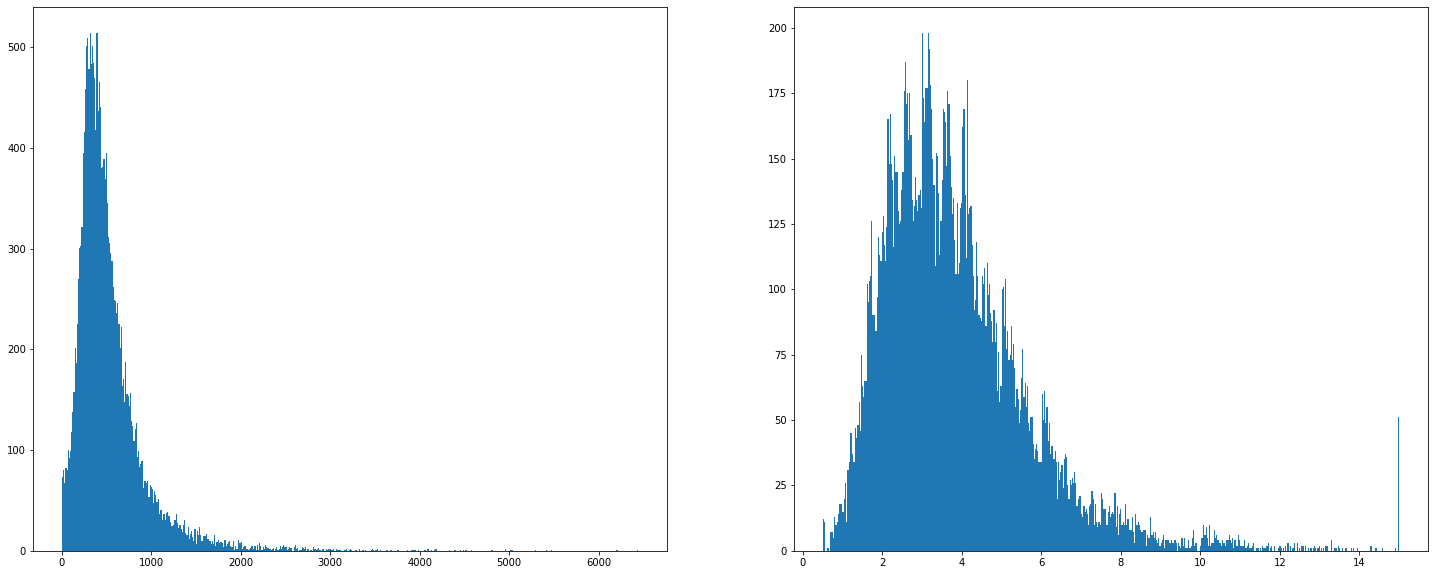

In [8]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 2, figsize=(25, 10))
# quartos
axs[0].hist(housing.total_bedrooms, bins=500)
# renda média
axs[1].hist(housing.median_income, bins=500)

plt.show() 

In [9]:
housing.total_bedrooms.describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [10]:
# households: número total de famílias por quarteirão
housing['avg_bedrooms'] = housing['total_bedrooms']/housing['households'] 
housing[['avg_bedrooms']].head()

,avg_bedrooms
0,1.023810
1,0.971880
2,1.073446
3,1.073059
4,1.081081


In [11]:
housing.avg_bedrooms.describe()

count    20433.000000
mean         1.097062
std          0.476104
min          0.333333
25%          1.006029
50%          1.048889
75%          1.099631
max         34.066667
Name: avg_bedrooms, dtype: float64

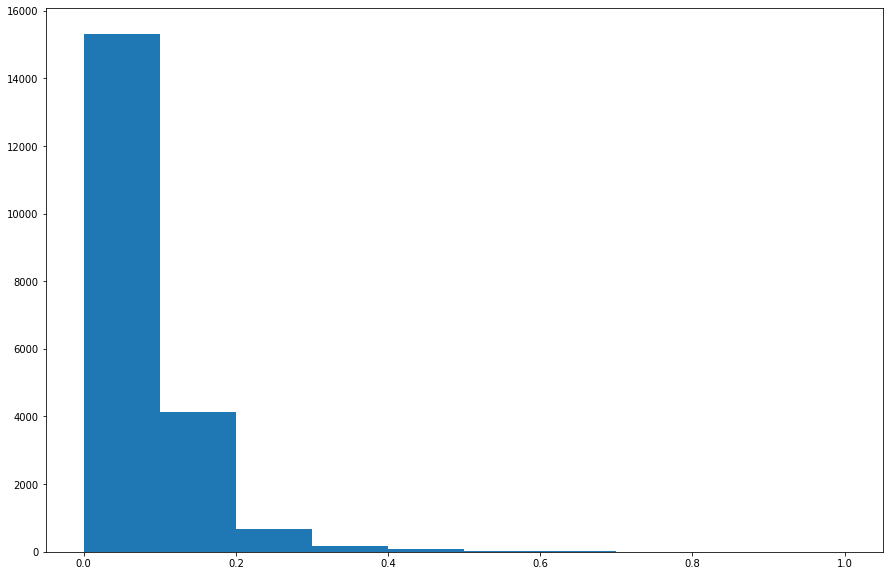

In [12]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper - lower)
    return y
  
total_bedrooms_normalized = normalize(housing.total_bedrooms)

fig, ax = plt.subplots(figsize=(15,10))
plt.hist(total_bedrooms_normalized)
plt.show()

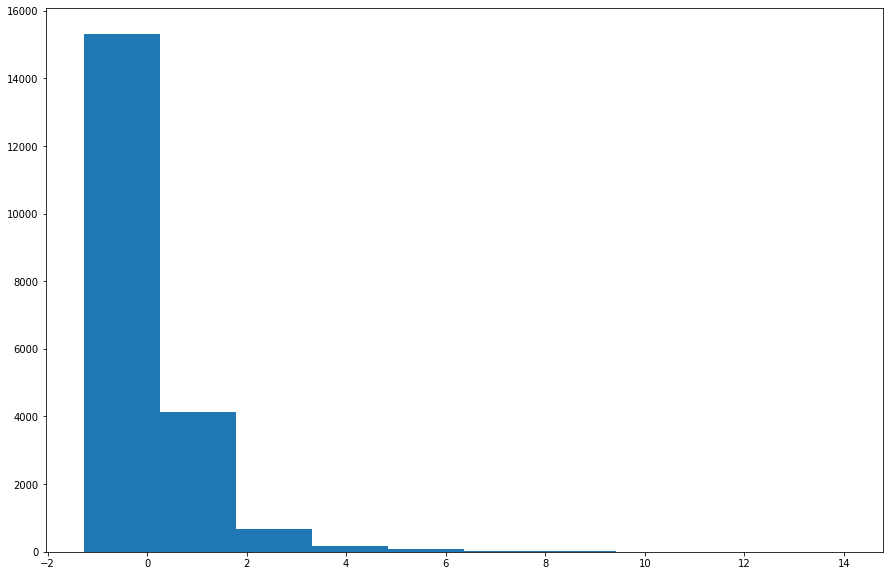

In [13]:
import numpy as np 

# média igual a 0 e um desvio padrão igual a 1
def standardize(column):  
    z = (column - column.mean())/np.std(column)
    return z
  
total_bedrooms_standardized = standardize(housing.total_bedrooms)
fig, ax = plt.subplots(figsize=(15,10))
plt.hist(total_bedrooms_standardized)
plt.show()

- Se a distribuição não é Gaussiana ou o desvio padrão é muito pequeno, normalizar os dados é uma escolha a ser tomada.

# usando log nos dados


Muitas variáveis na área de biologia têm distribuição lognormal. Então, analisar não a variável coletada, mas a variável transformada, isto é, o logaritmo (decimal ou neperiano) dessa variável, ajuda a estabilizar a variância e tornar a distribuição normal. Mas como se reconhece a necessidade da transformação logarítmica?
Se a variância dos grupos cresce com a média, é razoável optar pela variável transformada para a análise. A explicação é a de que, se a variável que você estuda é resultante de vários fatores que se multiplicam, então essa variável tem distribuição lognormal. Um exemplo é a altura das árvores de um pomar. A altura de uma árvore é afetada pelo solo, quantidade de água, de luz solar, de ventos etc. Então a variável altura das árvores de um pomar tem distribuição lognormal. Também deve ter distribuição lognormal o tempo de sobrevivência de bactérias em desinfetantes, o peso e a pressão sanguínea das pessoas.


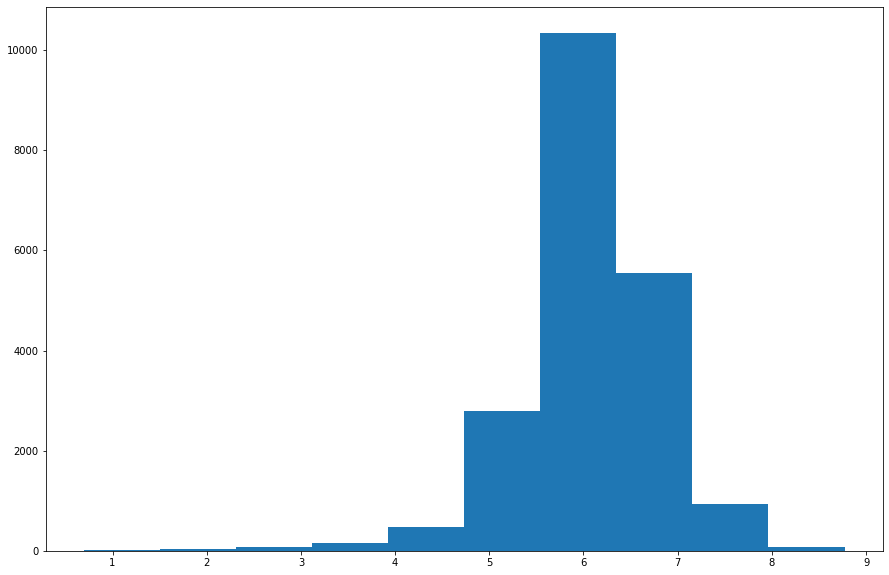

In [14]:
import numpy as np

total_bedrooms_log = np.log(housing.total_bedrooms + 1)
fig, ax = plt.subplots(figsize=(15,10))
plt.hist(total_bedrooms_log)
plt.show()

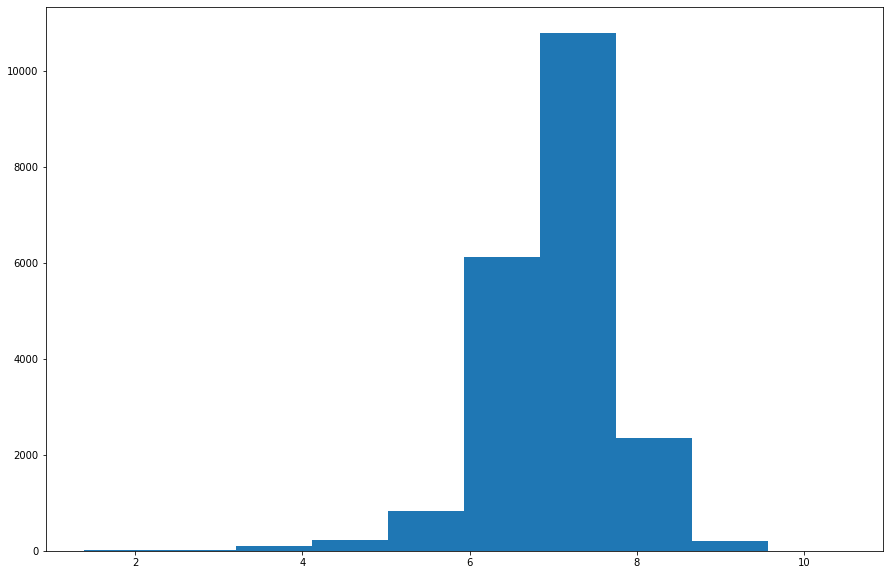

In [15]:
population_log = np.log(housing.population + 1)
fig, ax = plt.subplots(figsize=(15,10))
plt.hist(population_log)
plt.show()

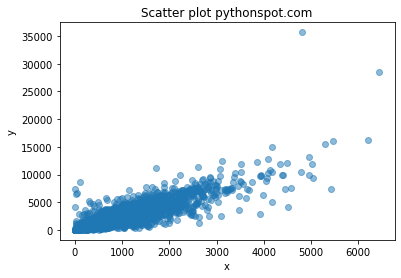

In [16]:
plt.scatter(housing.total_bedrooms, housing.population, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

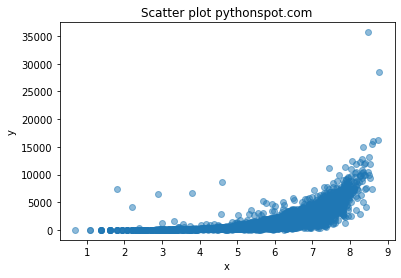

In [17]:
plt.scatter(total_bedrooms_log, housing.population, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

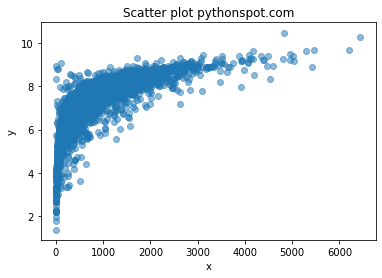

In [18]:
plt.scatter(housing.total_bedrooms, population_log, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

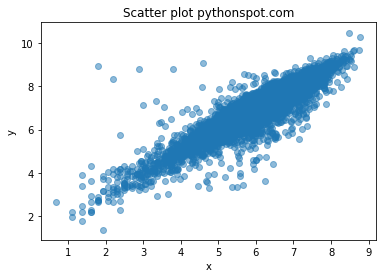

In [19]:
plt.scatter(total_bedrooms_log, population_log, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# quantis

In [38]:
print('25% : {}'.format(housing.median_house_value.quantile(q=0.25)))
print('25% : {}'.format(housing.median_house_value.quantile()))
print('75% : {}'.format(housing.median_house_value.quantile(q=0.75)))
print(housing.median_house_value.describe())

25% : 179700.0
50% : 119600.0
75% : 264725.0
count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64


In [79]:
A = pd.Series([1.2, 2.4, 4.5, 7.8, 8, 9.4, 9.56, 11.34, 12, 18])
data_sort = A.sort_values()

def calc_quantile(N, k, q):
    """
    N: tamanho da amostra
    k: k-ésimo quartil
    q: quantidades de quantis que dividiremos nossa amostra
    """
    return (N+1)*(k/q) 
 
posicao = calc_quantile(len(A), 2, 4)
print('posição encontrada: %s' %posicao)

# verificar se o valor nao é inteiro
if not posicao.is_integer():
    anterior = data_sort[int(posicao) - 1]
    posterior = data_sort[int(posicao)]
    media = (anterior + posterior) / 2
    
    print('valor da anterior: %s' %anterior)
    print('valor da seguinte: %s' %posterior)
    print('média: %s (%s)' %(media, int(media))) 
    posicao = int(media)
else:
    posicao -= 1

print('valor do primeiro quartil: %s' %data_sort[posicao - 1])
print('50% : {}'.format(data_sort.quantile(q=0.50)))


posição encontrada: 5.5
valor da anterior: 8.0
valor da seguinte: 9.4
média: 8.7 (8)
valor do primeiro quartil: 11.34
50% : 8.7


#  intervalo de interesse)

2.75
2.4
4.5
3.45
2.75
